In [52]:
pip uninstall numpy -y


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.


In [53]:
pip install matplotlib==3.8.4

  Using cached numpy-2.2.5-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp310-cp310-win_amd64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
file_path = 'ShartankIndiaAllPitches.csv'

In [56]:
df = pd.read_csv(file_path, encoding='unicode_escape')

In [57]:
print(df.to_string())

     Episode Number  Pitch Number                           Brand                                              Idea  Investment Amount (In Lakhs INR)   Debt (In lakhs INR)  Equity Anupam Ashneer Namita Aman Peyush Vineeta Ghazal  Season
0                 1             1             BluePine Industries                                      Frozen Momos                                 75                    0     18%      N       Y      N    Y      N       Y      N       1
1                 1             2                   Booz scooters     Renting e-bike for mobility in private spaces                                 40                    0     50%      N       Y      N    N      N       Y      N       1
2                 1             3             Heart up my Sleeves                                Detachable Sleeves                                 25                    0     30%      Y       N      N    N      N       Y      N       1
3                 2             4                   

In [58]:
print("Data Review")
df.describe()

Data Review


,Episode Number,Pitch Number,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Season
count,117.000000,117.000000,117.000000,117.000000,117.0
mean,18.735043,59.000000,21.683761,2.572650,1.0
std,10.070778,33.919021,26.067766,11.544753,0.0
min,1.000000,1.000000,0.000000,0.000000,1.0
25%,10.000000,30.000000,0.000000,0.000000,1.0
50%,19.000000,59.000000,10.000000,0.000000,1.0
75%,27.000000,88.000000,50.000000,0.000000,1.0
max,35.000000,117.000000,80.000000,99.000000,1.0


In [59]:
df.head()

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1


In [60]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [61]:
print(df.isnull().sum())
print(df.duplicated().sum())

Episode Number                       0
Pitch Number                         0
Brand                                0
Idea                                 0
Investment Amount (In Lakhs INR)     0
Debt (In lakhs INR)                  0
Equity                               0
Anupam                               0
Ashneer                              0
Namita                               0
Aman                                 0
Peyush                               0
Vineeta                              0
Ghazal                               0
Season                               0
dtype: int64
0


In [62]:
df[df.isnull().any(axis=1)]

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season


In [63]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
print("Data Types:\n", df.dtypes)

Missing Values:
 Series([], dtype: int64)
Data Types:
 Episode Number                        int64
Pitch Number                          int64
Brand                                object
Idea                                 object
Investment Amount (In Lakhs INR)      int64
Debt (In lakhs INR)                   int64
Equity                               object
Anupam                               object
Ashneer                              object
Namita                               object
Aman                                 object
Peyush                               object
Vineeta                              object
Ghazal                               object
Season                                int64
dtype: object


In [64]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [65]:
# Fill missing categorical values with mode
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_21956\155116035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [66]:
print("\nMissing values after treatment:\n", df.isnull().sum().sum())


Missing values after treatment:
 0


In [67]:
df.shape

(117, 15)

In [68]:
df.columns

Index(['Episode Number', 'Pitch Number', 'Brand', 'Idea',
       'Investment Amount (In Lakhs INR) ', 'Debt (In lakhs INR)', 'Equity',
       'Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal',
       'Season'],
      dtype='object')

In [69]:
# Handling outliers using IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter numerical columns for outlier removal
numerical_cols = df.select_dtypes(include=np.number).columns

# Removing outliers only from numerical columns
df_filtered = df[~((df[numerical_cols] < lower_bound[numerical_cols]) | (df[numerical_cols] > upper_bound[numerical_cols])).any(axis=1)]

df = df_filtered

In [70]:
df.dropna()

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,0,0,N,N,N,N,N,N,N,1
113,34,114,On2Cook,Fastest Cooking Device,0,0,0,N,N,N,N,N,N,N,1
114,35,115,Jain Shikanji,Lemonade,40,0,30.00%,Y,Y,N,Y,N,Y,N,1
115,35,116,Woloo,Washroom Finder,0,0,0,N,N,N,N,N,N,N,1


In [71]:
df.duplicated().sum()
df.count()

Episode Number                       109
Pitch Number                         109
Brand                                109
Idea                                 109
Investment Amount (In Lakhs INR)     109
Debt (In lakhs INR)                  109
Equity                               109
Anupam                               109
Ashneer                              109
Namita                               109
Aman                                 109
Peyush                               109
Vineeta                              109
Ghazal                               109
Season                               109
dtype: int64

In [72]:
df.value_counts()
df.describe()

,Episode Number,Pitch Number,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Season
count,109.000000,109.000000,109.000000,109.0,109.0
mean,18.825688,59.366972,21.247706,0.0,1.0
std,10.292791,34.693008,26.575593,0.0,0.0
min,1.000000,1.000000,0.000000,0.0,1.0
25%,10.000000,29.000000,0.000000,0.0,1.0
50%,19.000000,59.000000,10.000000,0.0,1.0
75%,28.000000,90.000000,50.000000,0.0,1.0
max,35.000000,117.000000,80.000000,0.0,1.0


In [73]:
df.head()


,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1


In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

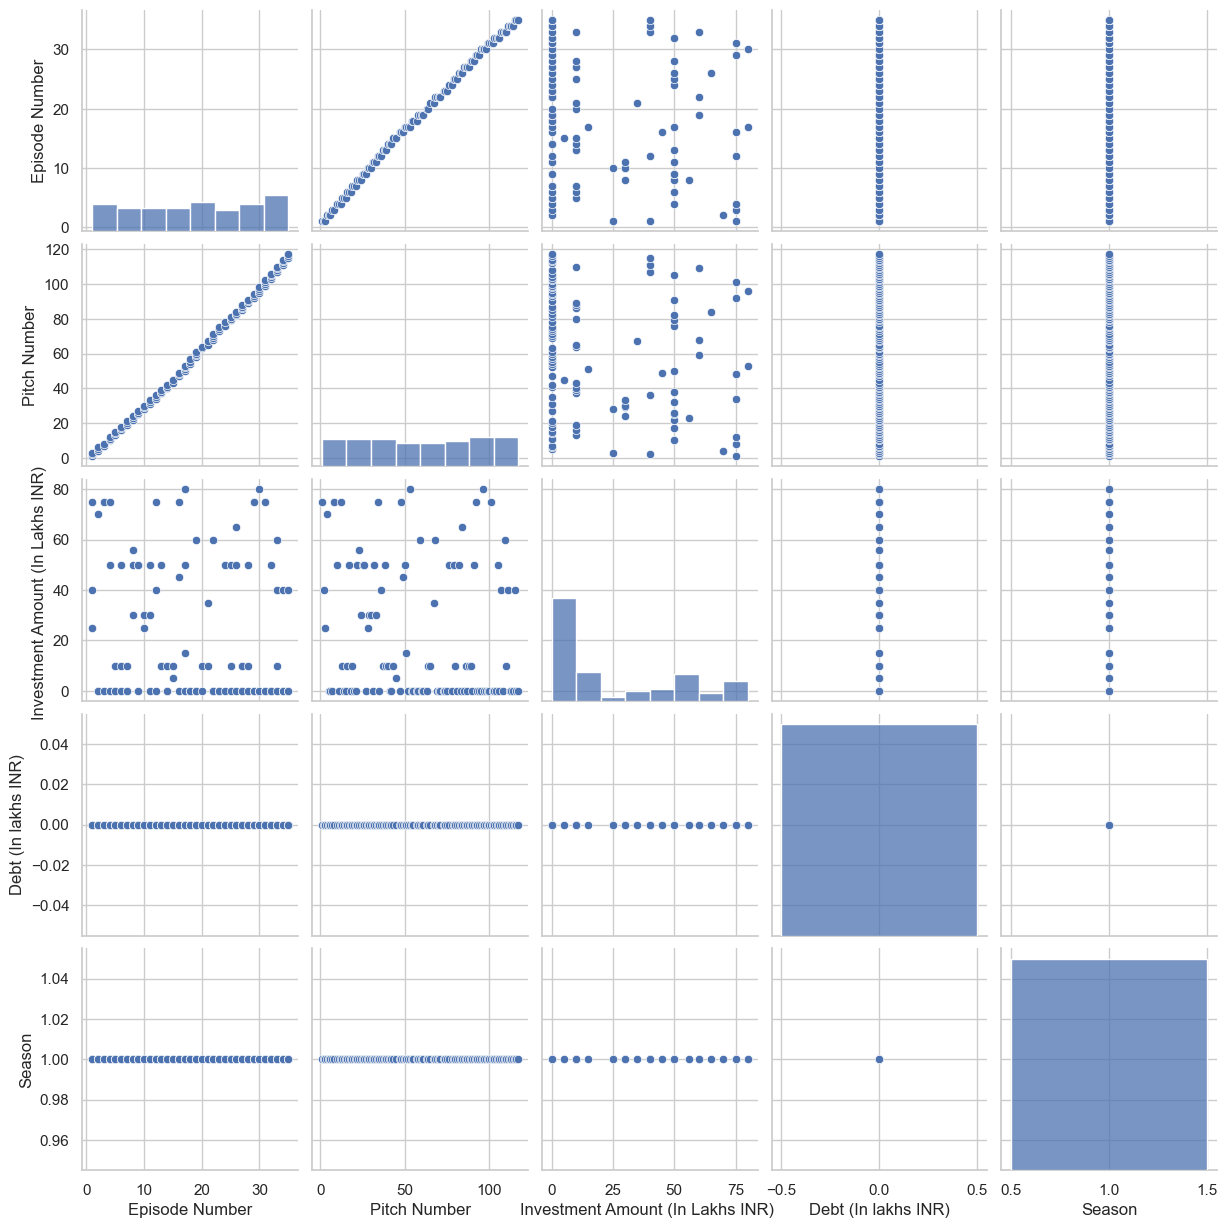

In [75]:
sns.pairplot(df)

c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Episode Number', ylabel='Episode Number'>,
        <Axes: xlabel='Pitch Number', ylabel='Episode Number'>,
        <Axes: xlabel='Investment Amount (In Lakhs INR) ', ylabel='Episode Number'>,
        <Axes: xlabel='Debt (In lakhs INR)', ylabel='Episode Number'>,
        <Axes: xlabel='Season', ylabel='Episode Number'>],
       [<Axes: xlabel='Episode Number', ylabel='Pitch Number'>,
        <Axes: xlabel='Pitch Number', ylabel='Pitch Number'>,
        <Axes: xlabel='Investment Amount (In Lakhs INR) ', ylabel='Pitch Number'>,
        <Axes: xlabel='Debt (In lakhs INR)', ylabel='Pitch Number'>,
        <Axes: xlabel='Season', ylabel='Pitch Number'>],
       [<Axes: xlabel='Episode Number', ylabel='Investment Amount (In Lakhs INR) '>,
        <Axes: xlabel='Pitch Number', ylabel='Investment Amount (In Lakhs INR) '>,
        <Axes: xlabel='Investment Amount (In Lakhs INR) ', ylabel='Investment Amount (In Lakhs INR) '>,
        <Axes: xlabel='Debt (In lakhs INR)', yla

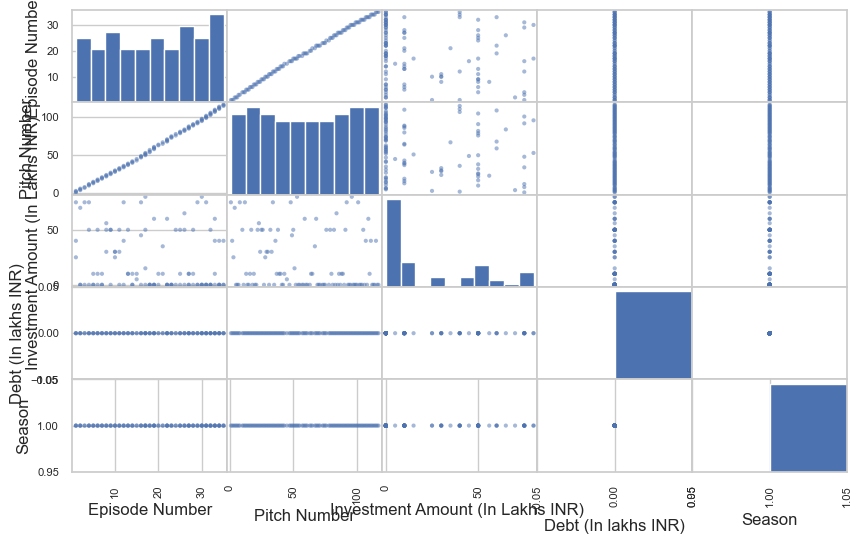

In [76]:
pd.plotting.scatter_matrix(df, figsize=(10, 6))

In [77]:
df = pd.DataFrame()

In [78]:
# Define investor columns
investor_cols = ["Anupam", "Ashneer", "Namita", "Aman", "Peyush", "Vineeta", "Ghazal"]

In [80]:
pip install lambda

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lambda: filename=lambda-0.0.1-py3-none-any.whl size=2359 sha256=fc128e9707484f2281f07ce81d177fcd56d7ab44ce358bf821593d3d76d86240
  Stored in directory: c:\users\shaik\appdata\local\pip\cache\wheels\64\ad\a3\1b31139286170daf82418c61ae0616c0936fea17cf264f9035
Successfully built lambda
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'lambda' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lambda'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [84]:
import pandas as pd

# Load your data
df = pd.read_csv(file_path)  # replace with the correct filename if needed

# List of investor columns
investor_cols = ['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']

# Create 'Investors' column by mapping 'Y' to investor name
df['Investors'] = df[investor_cols].apply(
    lambda row: ', '.join([investor for investor in investor_cols if row[investor] == 'Y']),
    axis=1
)

# Optional: Drop the original Y/N investor columns if no longer needed
# df.drop(columns=investor_cols, inplace=True)

# View the updated DataFrame
print(df[['Brand', 'Idea', 'Investors']].head())


                 Brand                                           Idea  \
0  BluePine Industries                                   Frozen Momos   
1        Booz scooters  Renting e-bike for mobility in private spaces   
2  Heart up my Sleeves                             Detachable Sleeves   
3           Tagz Foods                           Healthy Potato Chips   
4       Head and Heart                       Brain Development Course   

                Investors  
0  Ashneer, Aman, Vineeta  
1        Ashneer, Vineeta  
2         Anupam, Vineeta  
3                 Ashneer  
4                          


In [85]:
df.head()

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season,Investors
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1,"Ashneer, Aman, Vineeta"
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1,"Ashneer, Vineeta"
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1,"Anupam, Vineeta"
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1,Ashneer
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1,


In [86]:
df.drop(columns=['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal'], inplace=True)

In [87]:
df.head()

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Season,Investors
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,1,"Ashneer, Aman, Vineeta"
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,1,"Ashneer, Vineeta"
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,1,"Anupam, Vineeta"
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,1,Ashneer
4,2,5,Head and Heart,Brain Development Course,0,0,0,1,


In [88]:
df.to_csv("cleaned_sharktank_data.csv", index=False)


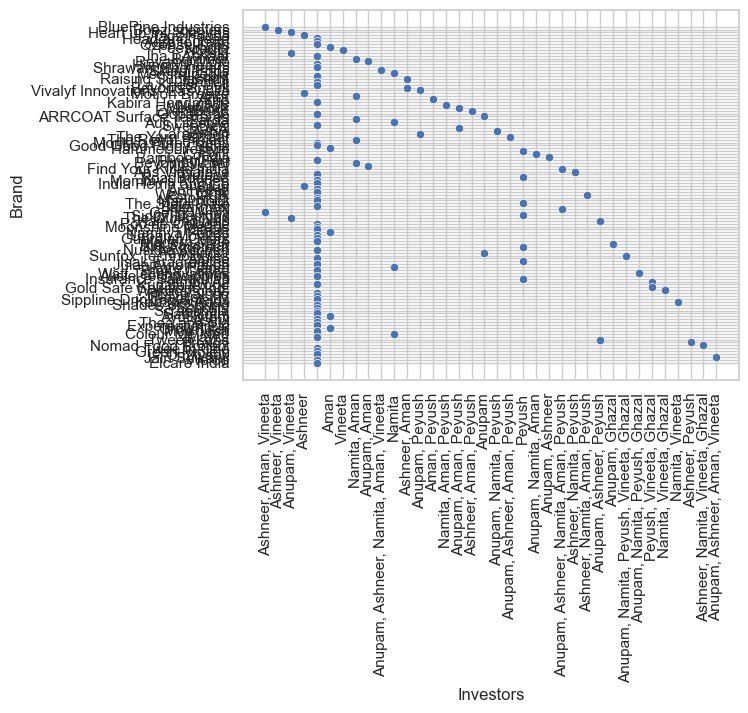

In [93]:
# Use scatterplot for specific x and y columns
sns.scatterplot(x='Investors', y='Brand', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()